In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Univariate Kalman Filter

#### Level

In [2]:
# transition matrix (x ~ Fx)
F = np.array([[1]])
# measurement function (x ~ Hz)
H = np.array([[1]])

In [3]:
# process noise covariance matrix ~ how much can we trust prediction
Q = np.diag([2e-1])
# measurement noise covariance matrix ~ how much can we trust measurements z
R = np.array([[1e1]])

In [4]:
n = 150
t = np.arange(0,n)
f_x = t

measurements = (f_x + 10*np.random.normal(0,1,n)).reshape(-1,1)

In [5]:
# initialization
# initial states
x = np.array([10])
# initial covariance matrix of state variables
P = np.diag([1])
# Identity matrix
I = np.eye(P.shape[0])

x_hist = x
for i in range(n):
    # prior (prediction)
    x = F.dot(x)
    P = F.dot(P).dot(F.T) + Q
    
    # observation
    z = measurements[i]
    # residual
    y = z - H.dot(x)
    # Kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(H.dot(P).dot(H.T) + R))
    # posterior (updated prediction)
    x = x + K.dot(y)
    P = (I - K.dot(H)).dot(P)
    
    x_hist = np.vstack([x_hist,x])

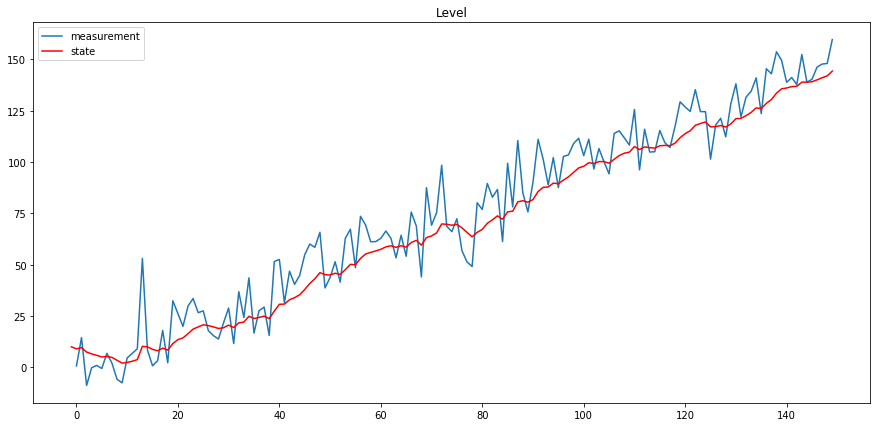

In [6]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(n),measurements[:,0],label='measurement')
plt.plot(np.arange(-1,n),x_hist[:,0],color='red',label='state')
plt.legend()
plt.title('Level')
plt.show()

In [7]:
# process noise covariance matrix ~ how much can we trust prediction
Q = np.diag([2e-1])
# measurement noise covariance matrix ~ how much can we trust measurements z
R = np.diag([1e1])

In [8]:
n = 150
t = np.arange(0,n)
f_x = t**2 /(n)

measurements = (f_x + 10*np.random.normal(0,1,n)).reshape(-1,1)

In [9]:
# initialization
# initial states
x = np.array([10])
# initial covariance matrix of state variables
P = np.diag([1])
# Identity matrix
I = np.eye(P.shape[0])

x_hist = x
for i in range(n):
    # prior (prediction)
    x = F.dot(x)
    P = F.dot(P).dot(F.T)
    
    # observation
    z = measurements[i]
    # residual
    y = z - H.dot(x)
    # Kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(H.dot(P).dot(H.T) + R))
    # posterior (updated prediction)
    x = x + K.dot(y)
    P = (I - K.dot(H)).dot(P)
    
    x_hist = np.vstack([x_hist,x])

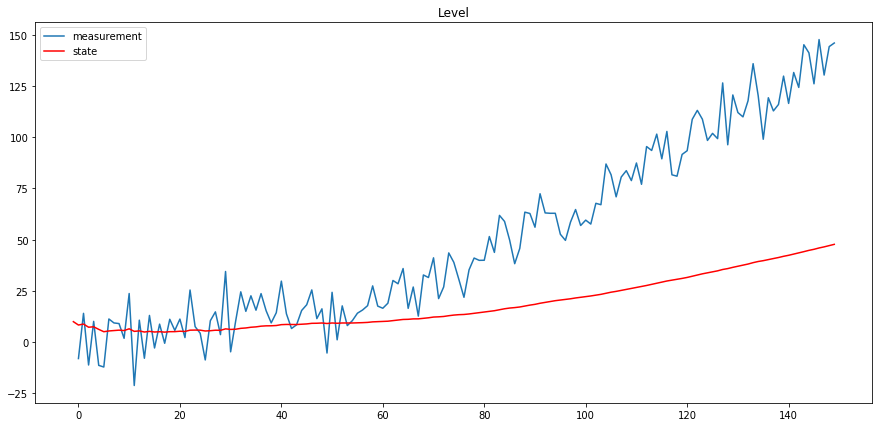

In [10]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(n),measurements[:,0],label='measurement')
plt.plot(np.arange(-1,n),x_hist[:,0],color='red',label='state')
plt.legend()
plt.title('Level')
plt.show()

#### Level, slope

In [11]:
# transition matrix (x ~ Fx)
F = np.array([[1,1], [0,1]])
# measurement function (z ~ Hx)
H = np.array([[1,0]])

In [12]:
# process noise covariance matrix ~ how much can we trust prediction
Q = np.diag([2e-1,2e-1])
# measurement noise covariance matrix ~ how much can we trust measurements z
R = np.diag([1e1])

In [13]:
n = 150
t = np.arange(0,n)
f_x = t**2 /(n)
f_v = 2*t/n

measurements = (f_x + 10*np.random.normal(0,1,n)).reshape(-1,1)

In [14]:
# initialization
# initial states
x = np.array([0,0])
# initial covariance matrix of state variables
P = np.diag([1, 100000])
# Identity matrix
I = np.eye(P.shape[0])

x_hist = x
for i in range(n):
    # prior (prediction)
    x = F.dot(x)
    P = F.dot(P).dot(F.T)
    
    # observation
    z = measurements[i]
    # residual
    y = z - H.dot(x)
    # Kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(H.dot(P).dot(H.T) + R))
    # posterior (updated prediction)
    x = x + K.dot(y)
    P = (I - K.dot(H)).dot(P)
    
    x_hist = np.vstack([x_hist,x])

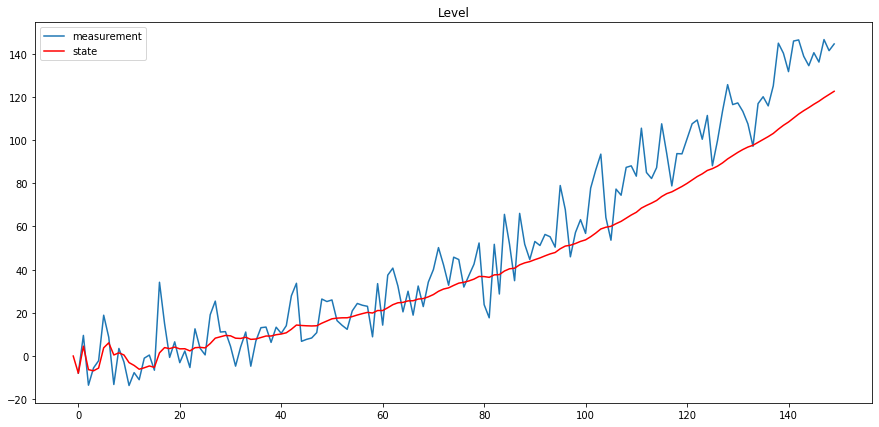

In [15]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(n),measurements[:,0],label='measurement')
plt.plot(np.arange(-1,n),x_hist[:,0],color='red',label='state')
plt.legend()
plt.title('Level')
plt.show()

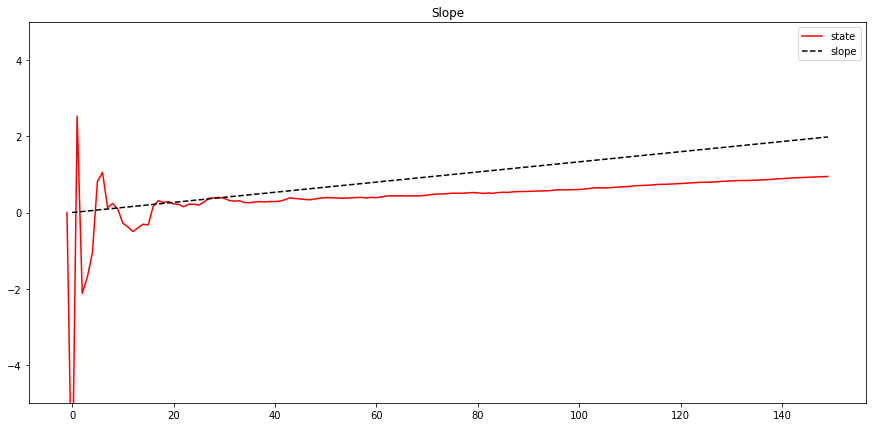

In [16]:
# plt.plot(np.arange(n),measurements[:,1])
plt.figure(figsize=(15,7))
plt.plot(np.arange(-1,n),x_hist[:,1],color='red',label='state')
plt.plot(t,f_v,linestyle='dashed',color='black',label='slope')
plt.ylim(bottom=-5,top=5)
plt.legend()
plt.title('Slope')
plt.show()

#### Level, slope, acceleration

In [17]:
# transition matrix (x ~ Fx)
F = np.array([[1,1,0],[0,1,1],[0,0,1]])
# measurement function (x ~ Hz)
H = np.array([[1,0,0]])

In [18]:
# process noise covariance matrix ~ how much can we trust prediction
Q = np.diag([2e-1,2e-1,2e-1])
# measurement noise covariance matrix ~ how much can we trust measurements z
R = np.diag([1e1])

In [19]:
n = 150
t = np.arange(0,n)
f_x = t**2 /(n)
f_v = 2*t/n
f_a = f_v*0 + 2/n

measurements = (f_x + 10*np.random.normal(0,1,n)).reshape(-1,1)

In [20]:
# initialization
# initial states
x = np.array([0,0,0])
# initial covariance matrix of state variables
P = np.diag([1,10000,10000])
# Identity matrix
I = np.eye(P.shape[0])

x_hist = x
for i in range(n):
    # prior (prediction)
    x = F.dot(x)
    P = F.dot(P).dot(F.T)
    
    # observation
    z = measurements[i]
    # residual
    y = z - H.dot(x)
    # Kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(H.dot(P).dot(H.T) + R))
    # posterior (updated prediction)
    x = x + K.dot(y)
    P = (I - K.dot(H)).dot(P)
    
    x_hist = np.vstack([x_hist,x])

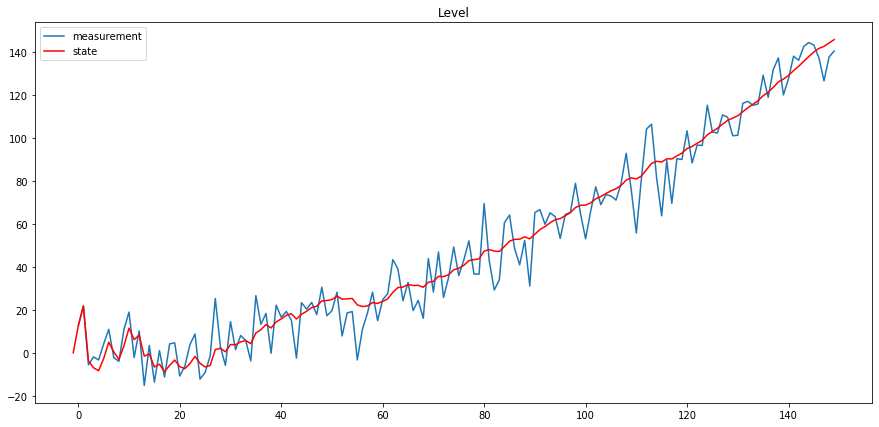

In [21]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(n),measurements[:,0],label='measurement')
plt.plot(np.arange(-1,n),x_hist[:,0],color='red',label='state')
plt.legend()
plt.title('Level')
plt.show()

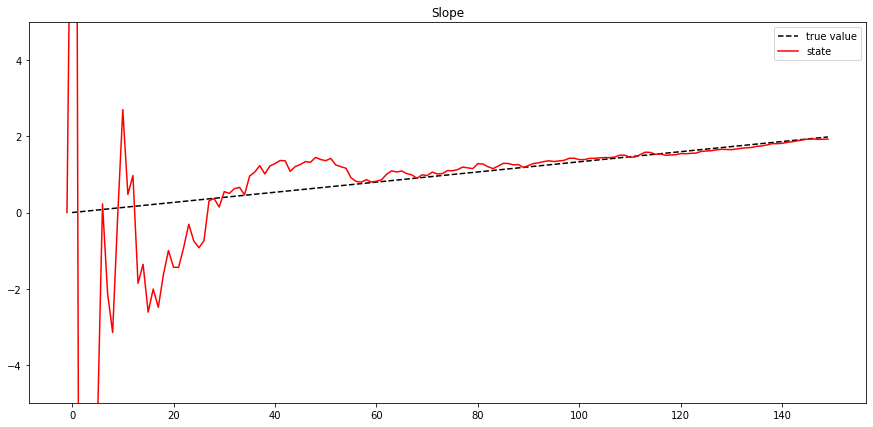

In [22]:
# plt.plot(np.arange(n),measurements[:,1])

plt.figure(figsize=(15,7))
plt.plot(t,f_v,linestyle='dashed',color='black',label='true value')
plt.plot(np.arange(-1,n),x_hist[:,1],color='red',label='state')
plt.ylim(bottom=-5,top=5)
plt.legend()
plt.title('Slope')
plt.show()

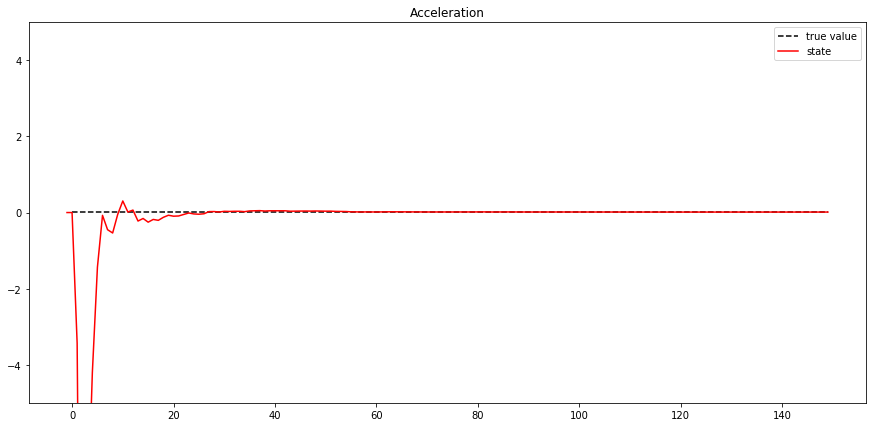

In [23]:
# plt.plot(np.arange(n),measurements[:,1])

plt.figure(figsize=(15,7))
plt.plot(t,f_a,linestyle='dashed',color='black',label='true value')
plt.plot(np.arange(-1,n),x_hist[:,2],color='red',label='state')
plt.ylim(bottom=-5,top=5)
plt.legend()
plt.title('Acceleration')
plt.show()

## Multivariate Kalman Filter

In [24]:
r = 0.99

a = -0.68
g = -0.05
b = 0.85
d = 0.5

In [25]:
# transition matrix (x ~ Fx)
F = np.array([[1,1,0,0,0,0,0,0,0],
              [0,1,1,0,0,0,0,0,0],
              [0,0,r,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,0,1]])
# measurement function (x ~ Hz)
H = np.array([[1,0,0,1,1,1,1,1,0],
              [0,0,0,0,0,0,0,a,0],
              [0,0,0,0,0,0,0,g,b],
              [0,0,0,0,0,0,0,d,0]])

In [26]:
# # process noise covariance matrix ~ how much can we trust prediction
# Q = np.diag([1e-1,2e-1,2e-1,2e-1,2e-1,2e-1,2e-1,2e-1,2e5,2e5])
# # measurement noise covariance matrix ~ how much can we trust measurements z
# R = np.diag([1e-5,1e-5,1e-5,1e10])

# process noise covariance matrix ~ how much can we trust prediction
Q = np.diag([2e-1,2e-5,2e-5,2e-5,2e-5,2e-5,2e-5,2e-5,2e1,2e-5])
# measurement noise covariance matrix ~ how much can we trust measurements z
R = np.diag([1e-5,1e-5,1e-5,1e5])

-6.860193577196037


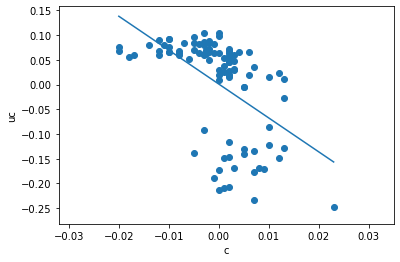

In [32]:
measurements = pd.read_excel('data.xlsx')

# estimation of a from Okun's law
y_change_rate = (measurements['Level'] - measurements['Level'].shift(1)) / measurements['Level']
y_change_rate = y_change_rate.values[1:].reshape(-1,1)
u_change = measurements['unemployment'] - measurements['unemployment'].shift(1)
u_change = u_change.values[1:].reshape(-1,1)

model = LinearRegression()
model.fit(u_change, y_change_rate)

print(model.coef_[0][0])

plt.scatter(u_change,y_change_rate)
u_arg = np.linspace(min(u_change),max(u_change),100)
plt.plot(u_arg,model.predict(u_arg))
plt.xlabel('c')
plt.ylabel('uc')
plt.show()

measurements['unemployment'] = (measurements['unemployment'] - measurements['unemployment'].shift(1)) / measurements['unemployment']
measurements['capacity_utilization'] = (measurements['capacity_utilization'] - measurements['capacity_utilization'].shift(1)) / measurements['capacity_utilization']

measurements = measurements.iloc[1:,1:].values

In [28]:
# initialization
# initial states
x = np.array([10000,0,0,0,0,0,0,0,0.1])
# initial covariance matrix of state variables
P = np.diag([1e8,1e7,1e7,1e7,1e7,1e7,1e7,1e7,1e8])
# Identity matrix
I = np.eye(P.shape[0])

x_hist = x
for i in range(measurements.shape[0]):
    # prior (prediction)
    x = F.dot(x)
    P = F.dot(P).dot(F.T)
    
    # observation
    z = measurements[i]
    # residual
    y = z - H.dot(x)
    # Kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(H.dot(P).dot(H.T) + R))
    # posterior (updated prediction)
    x = x + K.dot(y)
    P = (I - K.dot(H)).dot(P)
    
    x_hist = np.vstack([x_hist,x])

Text(0.5, 1.0, 'GDP level')

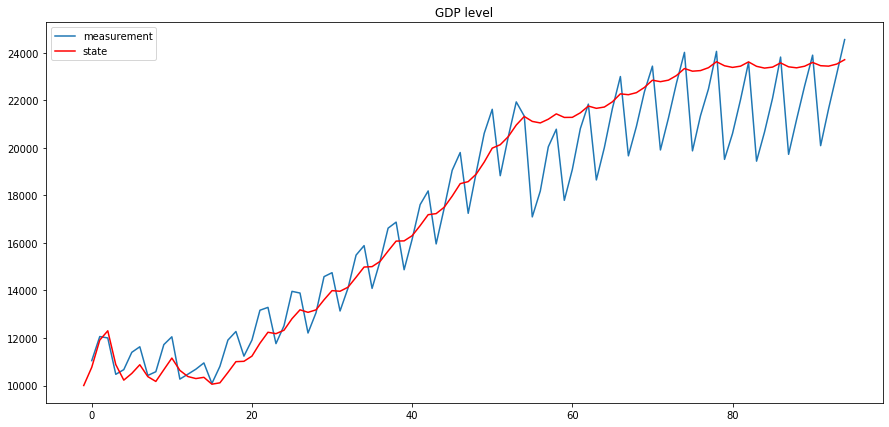

In [29]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(measurements.shape[0]),measurements[:,0],label='measurement')
plt.plot(np.arange(-1,measurements.shape[0]),x_hist[:,0],color='red',label='state')
plt.legend()
plt.title('GDP level')

Text(0.5, 1.0, 'Interest rate')

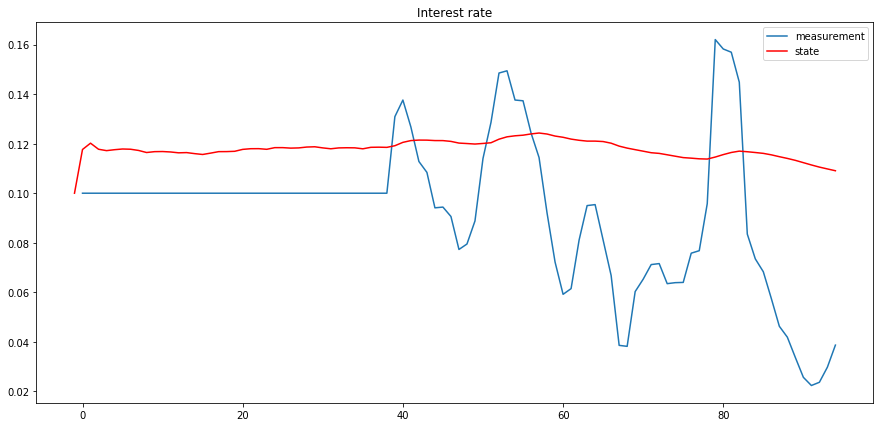

In [30]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(measurements.shape[0]),measurements[:,2],label='measurement')
plt.plot(np.arange(-1,measurements.shape[0]),x_hist[:,8],color='red',label='state')
# plt.ylim(bottom=min(measurements[:,2]),top=max(measurements[:,2]))
plt.legend()
plt.title('Interest rate')